<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Checkpoint Objective:**

In this checkpoint, we are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.

**Instructions**:

**Part 1: Logistic Regression**

1. Apply logistic regression.

2. Use confusion matrix to validate your model.

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

**Part 2: KNN**

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

**Part 3:  Decision tree and random forest**

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters),

4. Calculate the new accuracy and compare it with the previous results.

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant



**IMPORTING LIBRAIRIES**

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeClassifier


In [384]:
#Show head of the dataset
#Convert the csv file to dataframe

data = pd.read_csv("titanic-passengers.csv", sep = None)
data.head()

<ipython-input-384-e439e55ea631>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("titanic-passengers.csv", sep = None)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [386]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [388]:
#we can notice that missing values are almost all found on Cabin's column
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [389]:
#we can notice that missing values are almost all found on Embarked's comlun
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [390]:
#Data preprocessing to preprocess your data: find missing informations and
#replace them by the appropriate values.

#Replacing missing values for column 'Age'

data['Age'].fillna(data['Age'].median(), inplace = True)

#Choix de la médiane pour éviter que les valeurs aberrantes aient un impact sur l'annalyse des données

In [391]:
#Replacing missing values for column 'Cabin'

data['Embarked'].fillna(data['Embarked'].mode(), inplace = True)

#Choix du mode parce que nous avons des données de type catégoriel

In [392]:
data.drop('Cabin', inplace=True, axis=1)
#Drop Cabin's column because there are many missing values

In [393]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [394]:
#Correlation

cor = data.corr()
cor

<ipython-input-394-eb2be05c8af8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096688,0.159651,0.216225,1.000000


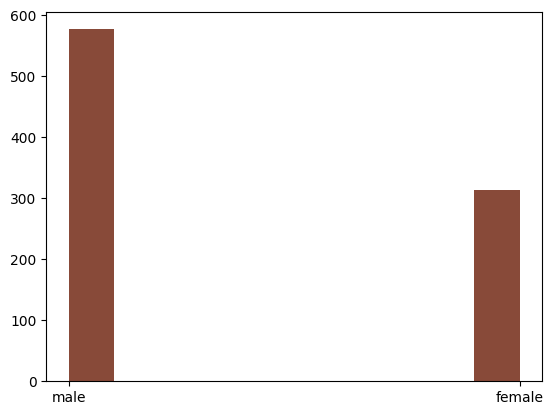

In [395]:
plt.hist(data['Sex'], color = '#884A39')
plt.show()
#Il y avait plus dhommes que de femmes à bord

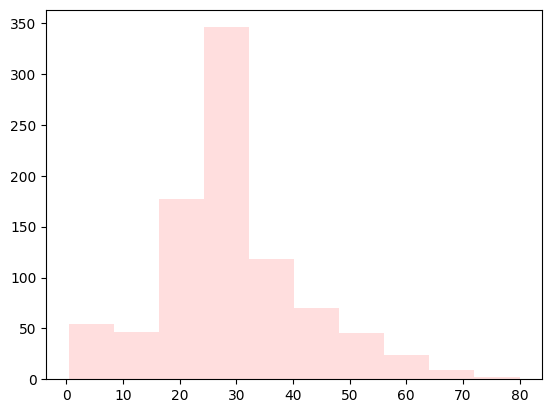

In [396]:
plt.hist(data['Age'], color = '#FFDEDE')
plt.show()
#Tranche d'âge de notre étude

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


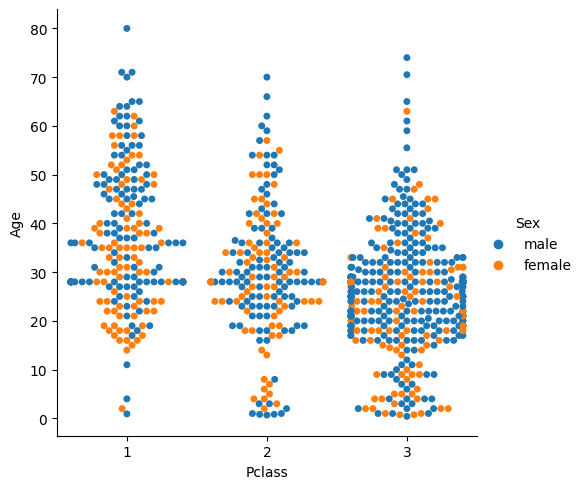

In [397]:
sns.catplot(data=data, x="Pclass", y="Age", hue="Sex", kind="swarm")


In [398]:
#LABEL ENCODER FUNCTION

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Survived'] = encoder.fit_transform(list(data['Survived']))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


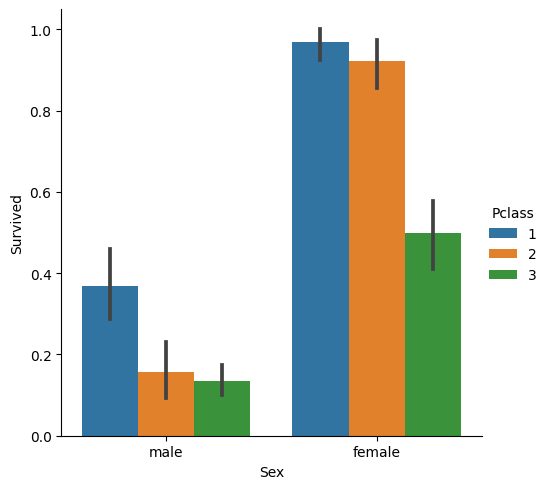

In [399]:
sns.catplot(data=data, x="Sex", y="Survived", hue="Pclass", kind="bar")

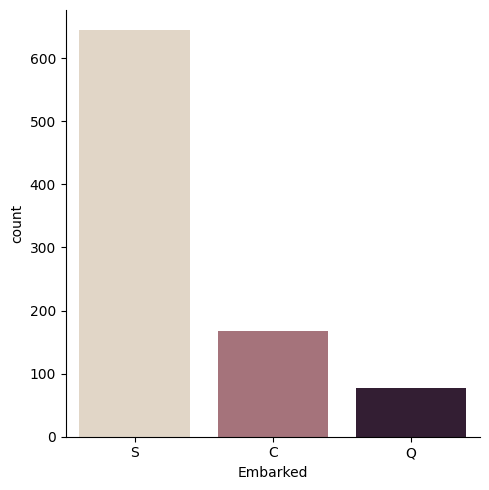

In [400]:
sns.catplot(data=data, x="Embarked", kind="count", palette="ch:.25")


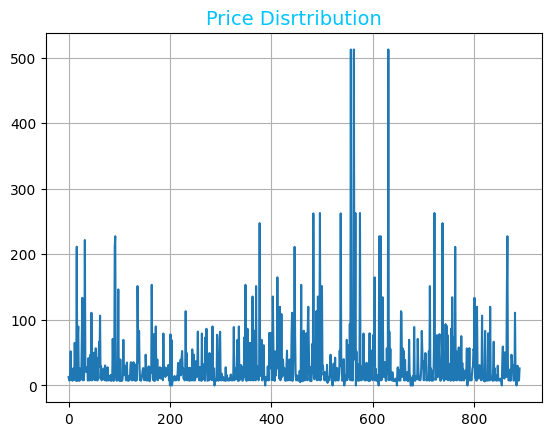

In [401]:
data['Fare'].plot.line()
plt.title('Price Disrtribution', fontsize=14, color = '#00C4FF')
plt.grid(True)
plt.show()

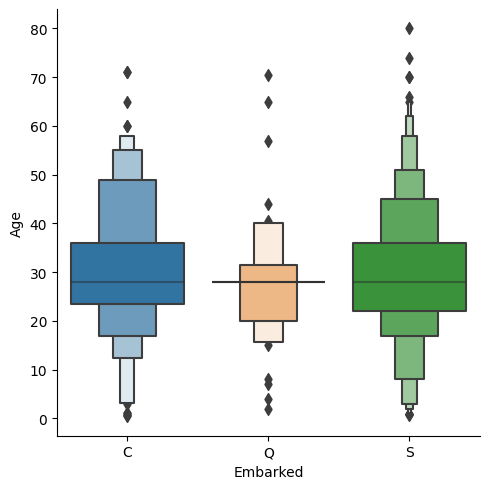

In [402]:
sns.catplot(
    data=data.sort_values("Embarked"),
    x="Embarked", y="Age", kind="boxen",
)

**Part 1: Logistic Regression**

Apply logistic regression.

Use confusion matrix to validate your model.

Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

In [403]:
#Logistic Regression Data Preparation
#preparing data for logistic regression

data["Sex"] = data["Sex"].map({"female": 1, "male": 0, "Unknown": -1}).fillna(-1)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,S


In [424]:
#Logistic Regression Code

#features extraction
x = data[['Sex', 'Pclass','Age']]
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
Accuracy_LogReg = logreg.score(x_test, y_test)
print("Accuracy = {:.2f}".format(Accuracy_LogReg))

Accuracy = 0.81


***OBSERVATION***

The probability that a passenger will survive based on his Class, his Sex and his Age is 0.81

In [405]:
#import seaborn as sns
#sns.regplot(x='Pclass',y='Age',data=data)

<Axes: xlabel='Predicted', ylabel='Actual'>

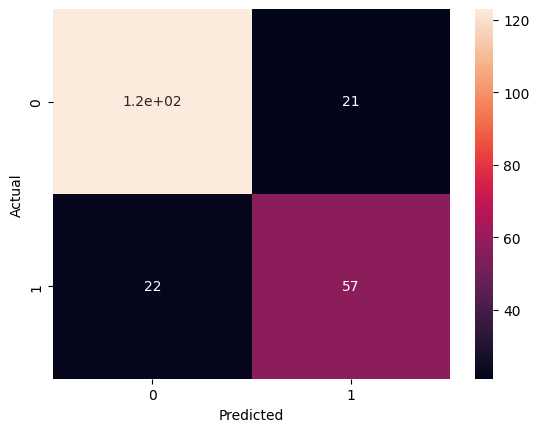

In [406]:
#Use confusion matrix to validate your model

#confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

True Positive = 1.2e+02
The actual value was positive and the model predicted a positive value
- The model predicted that the passenger will survived and it was right !

False Negative = 22
The actual value was positive and the model predicted a negative value
- The model predicted that the passenger won't survived and it was wrong

False Positive = 21
The actual value was negative and the model predicted a positive value
- The model predicted that the passenger will survived and it was wrong

True Negative = 51
The actual value was negative and the model predicted a negative value
- The model predicted that the passenger won't survived and it was right

In [407]:
#Importing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       144
           1       0.73      0.72      0.73        79

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



- Accuracy:

Combien de prédictions correctes nous avons faites à partir de toutes les observations : **Accuracy = 81%**


- Recall:

Sur tous les passagers qui ont survécus, combien avons-nous obtenu de bons résultats ? **Recall = 72%**

- Precision:
Sur tous les passagers que nous avons prédits "Survivants", combien avons-nous réellement réussi : **Precision=73%**



**Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case**

“Area Under the Curve” (AUC) of the “Receiver Operating Characteristic” (ROC).

In [408]:
from sklearn.metrics import roc_curve

#Predict probability
y_pred_  = logreg.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc score
auc_score = roc_auc_score(y_test, y_pred_[:,1])
print(auc_score)


0.8388273558368494


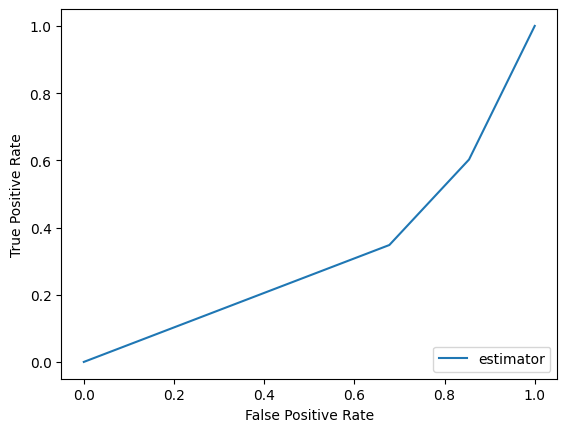

In [409]:
y = np.array(data['Survived'])
x = np.array(data['Pclass'])
fpr, tpr, thresholds = metrics.roc_curve(y, x)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,estimator_name='estimator')
display.plot()
plt.show()

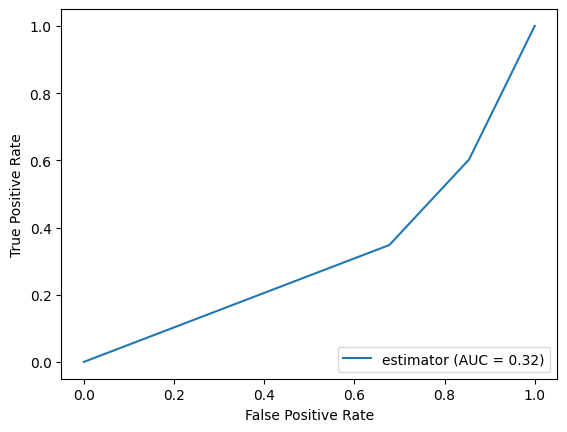

In [410]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='estimator')
display.plot()

**La probabilité que le classificateur puisse parfaitement faire la distinction entre tous les points de classe positifs et négatifs est de 32%**.

**Part 2: KNN**

Apply the KNN and predict your model

Choose the optimal number of neighbors


In [425]:
#Apply the KNN and predict your model

#Reshape our data

_x = np.array(data['Age'])
x = _x.reshape(-1, 1)
_y = np.array(data['Survived'])
y = _y.reshape(-1, 1)
#Knn Code

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20%

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
Accuracy_KNN = accuracy_score(y_pred,y_test)
print('Accuracy = ',Accuracy_KNN)

Accuracy =  0.5921787709497207


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [412]:
#Choose the optimal number of neighbors

n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy for k= 1 is: 0.59
Accuracy for k= 2 is: 0.59
Accuracy for k= 3 is: 0.59
Accuracy for k= 4 is: 0.59
Accuracy for k= 5 is: 0.59
Accuracy for k= 6 is: 0.59
Accuracy for k= 7 is: 0.59
Accuracy for k= 8 is: 0.58
Accuracy for k= 9 is: 0.61
Accuracy for k= 10 is: 0.59
Accuracy for k= 11 is: 0.6
Accuracy for k= 12 is: 0.6
Accuracy for k= 13 is: 0.6
Accuracy for k= 14 is: 0.6
Accuracy for k= 15 is: 0.61
Accuracy for k= 16 is: 0.61
Accuracy for k= 17 is: 0.61
Accuracy for k= 18 is: 0.61
Accuracy for k= 19 is: 0.61
Accuracy for k= 20 is: 0.61
Accuracy for k= 21 is: 0.63
Accuracy for k= 22 is: 0.6
Accuracy for k= 23 is: 0.59
Accuracy for k= 24 is: 0.6
Accuracy for k= 25 is: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 26 is: 0.55
Accuracy for k= 27 is: 0.5
Accuracy for k= 28 is: 0.54
Accuracy for k= 29 is: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Testing Accuracy')

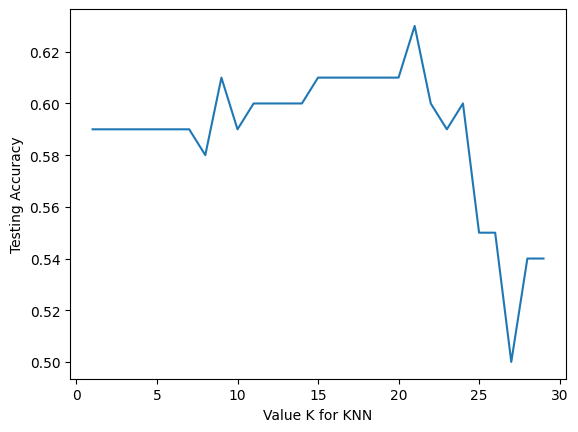

In [413]:
#Optimal K Value Plot

import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

#Thanks to this plot we can easily find out the best value of K


**Part 3: Decision tree and random forest**

Apply decision tree and predict you model

Plot your decision tree and try to read the tree branches and conclude a prediction manually.

Change the decision tree parameters(change at least two parameters),

Calculate the new accuracy and compare it with the previous results.

Use random forest then change the number of estimators

Calculate the new accuracy and compare it with the previous result.


In [426]:
#Apply decision tree and predict you model
from sklearn import tree
x = data.drop(["Sex", "Pclass", "Age"], axis=1)
y = data["Survived"]

# Apply one-hot encoding to categorical columns
x_encoded = pd.get_dummies(x)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.20, random_state=10)

# Applying the tree algorithm
our_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5 )
our_tree.fit(x_train, y_train)   # Fitting our model
y_pred = our_tree.predict(x_test)   # Evaluating our model
Accuracy_DecTree = accuracy_score(y_test, y_pred)
print("score: ", Accuracy_DecTree)

score:  1.0


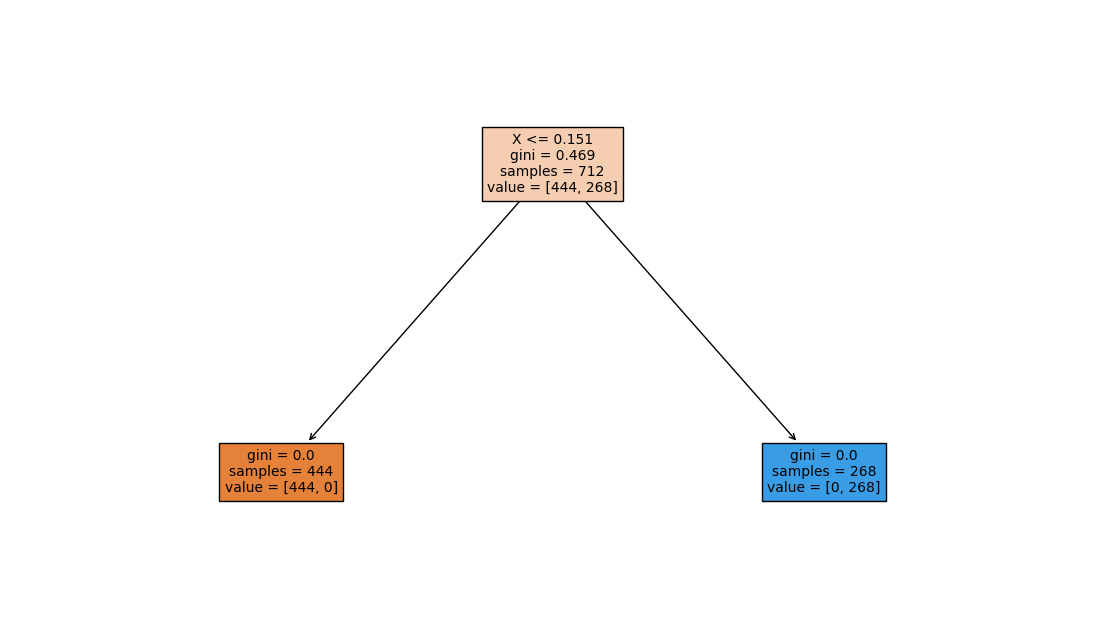

In [415]:
# visualise the decision tree

fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(our_tree,
              feature_names='XX1',
              filled=True,
              fontsize=10)

Nous avons sur chaque branche de notre arbre:

Gini Impurity
nombre total d'échantillons
nombre d'échantillons par classe
En fait, un score de Gini supérieur à 0 implique que les échantillons contenus dans ce nœud appartiennent à des classes différentes. Mais là nous pouvons voir que nos scores sont égales à 0.0. Alors compte tenu de notre dataset nos échantillons contenus n'appartiennent pas vraiment à des classes différentes.

In [416]:
#Change Parameters

#Apply decision tree and predict you model
from sklearn import tree
x = data.drop(["Sex", "Age", "Survived"], axis=1)
y = data["Pclass"]

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Apply one-hot encoding to categorical columns
x_encoded = pd.get_dummies(x)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.20, random_state=10)

# Applying the tree algorithm
our_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5 )
our_tree.fit(x_train, y_train)   # Fitting our model
y_pred = our_tree.predict(x_test)   # Evaluating our model
print("score: {}".format(accuracy_score(y_test, y_pred)))

score: 1.0


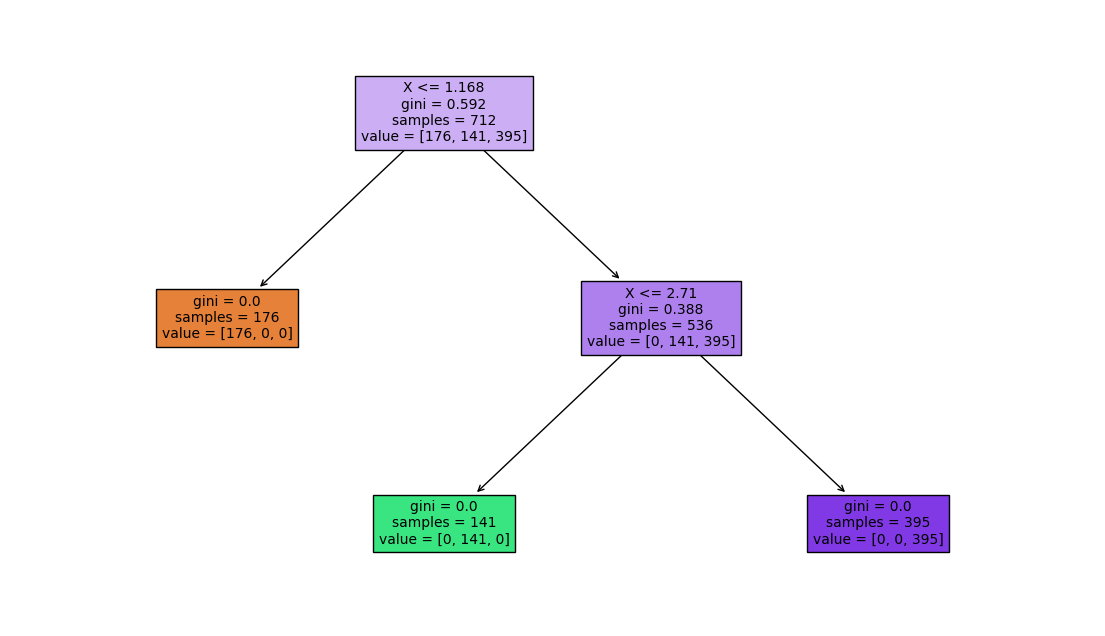

In [417]:
# visualise the decision tree
fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(our_tree,
              feature_names='XX1',
              filled=True,
              fontsize=10)

In [418]:
#Calculate the new accuracy and compare it with the previous result.

our_tree=tree.DecisionTreeClassifier()

#Reshape our data
_x = np.array(y_test)
x = _x.reshape(-1, 1)
_y = np.array(y_pred)
y = _y.reshape(-1, 1)
scores = cross_val_score(our_tree, x, y, cv=5)
print("Accuracy on each fold/subset : ", scores)
print("The average accuracy is : ", sum(scores)/5)

#We can notice that accuracies are equal.

Accuracy on each fold/subset :  [1. 1. 1. 1. 1.]
The average accuracy is :  1.0


In [427]:
#Use random forest then change the number of estimators

#Random Forest prediction

RFC=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
RFC.fit(x_train, y_train)  #Training our model
y_pred=RFC.predict(x_test)  #testing our model
Accuracy_RandForest = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy_RandForest)  #Measuring the accuracy of our model

Accuracy: 1.0


In [420]:
#Calculate the new accuracy and compare it with the previous result.

clf=RandomForestClassifier(n_estimators=100)

#Reshape our data
_x = np.array(y_test)
x = _x.reshape(-1, 1)
_y = np.array(y_pred)
y = _y.reshape(-1, 1)
scores = cross_val_score(RFC, x, y, cv=5)
print("Accuracy on each fold/subset : ", scores)
print("The average accuracy is : ", sum(scores)/5)

#Note : K-fold cross validation can be used on any algorithm.

Accuracy on each fold/subset :  [1. 1. 1. 1. 1.]
The average accuracy is :  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [421]:
# look at the feature importances
#dfFeatures = pd.DataFrame({'Features':'Survived','Importances':our_tree.feature_importances_})
#dfFeatures

**Now to finalize your project**:

make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-432-c9e1a8b22425>:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


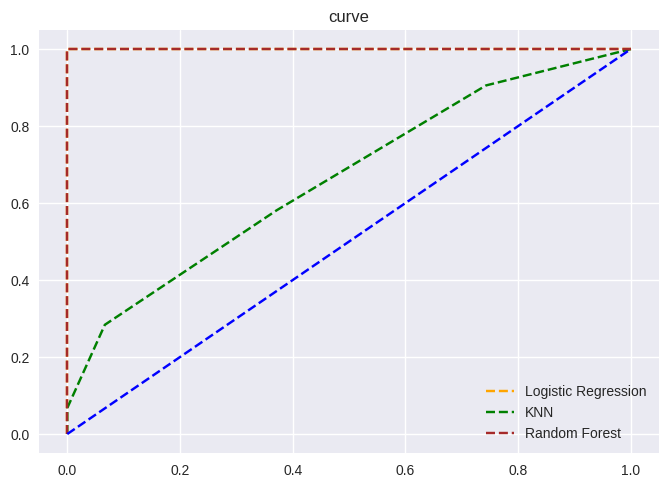

In [432]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#Random Forest
model3 = RandomForestClassifier(n_estimators=10)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='brown', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('curve')


plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


On peut alors en déduire que le Random Forest et Logistic Regression sont supérieurs au KNN.

Par conséquent, nous pouvons dire que la régression logistique et le Random Forest ont mieux classé la classe positive dans l'ensemble de données.